# Lab1

The set covering problem is known to have a complex combinatorial structure with many local minima. Hill Climbing easily gets stuck in one of these minima, while Simulated Annealing, thanks to its ability to accept worse solutions, is able to break out of these minima and continue to explore other areas of the solution space.
The balance between exploration and exploitation offered by Simulated Annealing is particularly suited to problems like Set Cover, where the number of possible combinations is very large and there is no simple path to continuous improvement.

Another common method used is the Greedy Algorithm approach, which works by selecting the largest unused set at each step. This method often returns good results as it tends to cover the maximum elements at every step[1].

In this solution of the Set Covering Problem it's used a Simulated Annealing algorithm.

In [1]:
from random import random, seed
from itertools import product
import numpy as np
from matplotlib import pyplot as plt
from icecream import ic
from tqdm import tqdm

## Universe and sets generation:

In [2]:

UNIVERSE_SIZES = [100, 1000, 10_000, 100_000, 100_000, 100_000]
NUM_SETS_LIST = [10, 100, 1000, 10_000, 10_000, 10_000]

#density is the probability that an element of the universe is covered by a set
DENSITIES = [0.2, 0.2, 0.2, 0.1, 0.2, 0.3]


## Helper functions

In [3]:
def valid(solution):
    """Checks whether the solution is valid (covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))

def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

def fitness(solution: np.array) -> tuple:
    """Returns a tuple (validity, negative cost) to maximize validity and minimize cost."""
    return (valid(solution), -cost(solution))


## Optimization Function with simulated annealing



In [4]:
#cooling rate is the rate which the temperature on each iteration decrease with

def simulated_annealing(sets, costs, num_sets, density, rng, initial_temp=1000.0, cooling_rate=0.995, min_temp=1e-6, max_iter=20_000):
    if (num_sets) < 1000:
        current_solution = rng.random(num_sets) < 1
    else:  
        current_solution = rng.random(num_sets) < 0.5
    current_fitness = fitness(current_solution)

    best_solution = current_solution
    best_fitness = current_fitness

    temperature = initial_temp
    history = [current_fitness[1]]

    for iteration in tqdm(range(max_iter), desc="Simulated Annealing Progress"):
        
        new_solution = current_solution.copy()

        #swapping of one set from the current solution with another one
        swap_idx = np.random.randint(num_sets)
        new_solution[swap_idx] = not new_solution[swap_idx]  

        new_fitness = fitness(new_solution)


        if not valid(new_solution):
            continue
        
        
        if new_fitness > current_fitness or random() < np.exp(-(current_fitness[1] - new_fitness[1]) / temperature):
            current_solution = new_solution
            current_fitness = new_fitness

            if current_fitness > best_fitness:
                best_solution = current_solution
                best_fitness = current_fitness
        # cool gradually the temperature
        temperature = max(temperature * cooling_rate, min_temp)

        history.append(current_fitness[1])

        if temperature <= min_temp:
            break
        ic(iteration, best_fitness, temperature)

    return best_solution, best_fitness, history

## Sets and costs initialization, run the program with the different six parameters of universe, set and density

Solving for Universe Size: 100, Num Sets: 10, Density: 0.2


Simulated Annealing Progress:   0%|          | 0/20000 [00:00<?, ?it/s]ic| iteration: 8
    best_fitness: (np.True_, np.float64(-256.952259039256))
    temperature: 995.0
Simulated Annealing Progress:   0%|          | 9/20000 [00:00<30:10, 11.04it/s]ic| iteration: 10
    best_fitness: (np.True_, np.float64(-256.952259039256))
    temperature: 990.025
Simulated Annealing Progress:   0%|          | 11/20000 [00:00<30:03, 11.08it/s]ic| iteration: 13
    best_fitness: (np.True_, np.float64(-256.952259039256))
    temperature: 985.074875
ic| iteration: 23
    best_fitness: (np.True_, np.float64(-256.952259039256))
    temperature: 980.149500625
Simulated Annealing Progress:   0%|          | 24/20000 [00:01<12:53, 25.81it/s]ic| iteration: 26
    best_fitness: (np.True_, np.float64(-256.952259039256))
    temperature: 975.248753121875
ic| iteration: 30
    best_fitness: (np.True_, np.float64(-256.952259039256))
    temperature: 970.3725093562656
Simulated Annealing Progress:   0%|          | 

Best solution cost for Universe Size 100: (np.True_, np.float64(-256.952259039256))
Best solution found: [ True  True  True  True  True False  True  True  True  True]


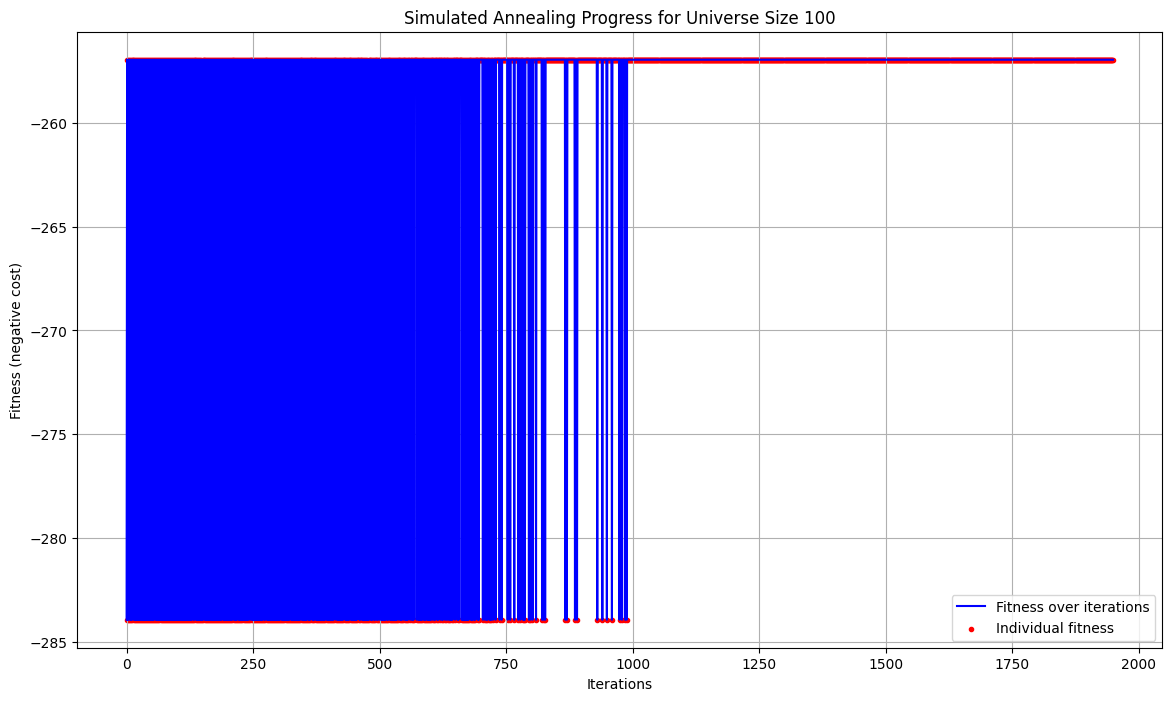

Solving for Universe Size: 1000, Num Sets: 100, Density: 0.2


Simulated Annealing Progress:   0%|          | 0/20000 [00:00<?, ?it/s]ic| iteration: 0
    best_fitness: (np.True_, np.float64(-34080.13595045973))
    temperature: 995.0
ic| iteration: 1
    best_fitness: (np.True_, np.float64(-33749.73744625204))
    temperature: 990.025
Simulated Annealing Progress:   0%|          | 2/20000 [00:00<40:24,  8.25it/s]ic| iteration: 2
    best_fitness: (np.True_, np.float64(-33406.269268170945))
    temperature: 985.074875
ic| iteration: 3
    best_fitness: (np.True_, np.float64(-33075.87076396326))
    temperature: 980.149500625
Simulated Annealing Progress:   0%|          | 4/20000 [00:00<35:15,  9.45it/s]ic| iteration: 4
    best_fitness: (np.True_, np.float64(-32736.141471036426))
    temperature: 975.248753121875
Simulated Annealing Progress:   0%|          | 5/20000 [00:00<36:04,  9.24it/s]ic| iteration: 5
    best_fitness: (np.True_, np.float64(-32343.742073700098))
    temperature: 970.3725093562656
ic| iteration: 6
    best_fitness: (np.True_,

Best solution cost for Universe Size 1000: (np.True_, np.float64(-7373.195692664685))
Best solution found: [False False False False False False False False False False False False
  True False False False False False False False False False False  True
 False False False False False False False False False  True  True  True
 False False  True False False False False  True False False False False
 False  True  True False False False False False  True False  True False
  True  True False False  True False  True False False False False False
 False False False False  True False  True False False False  True False
 False False  True False False False False  True  True False False False
 False False False False]


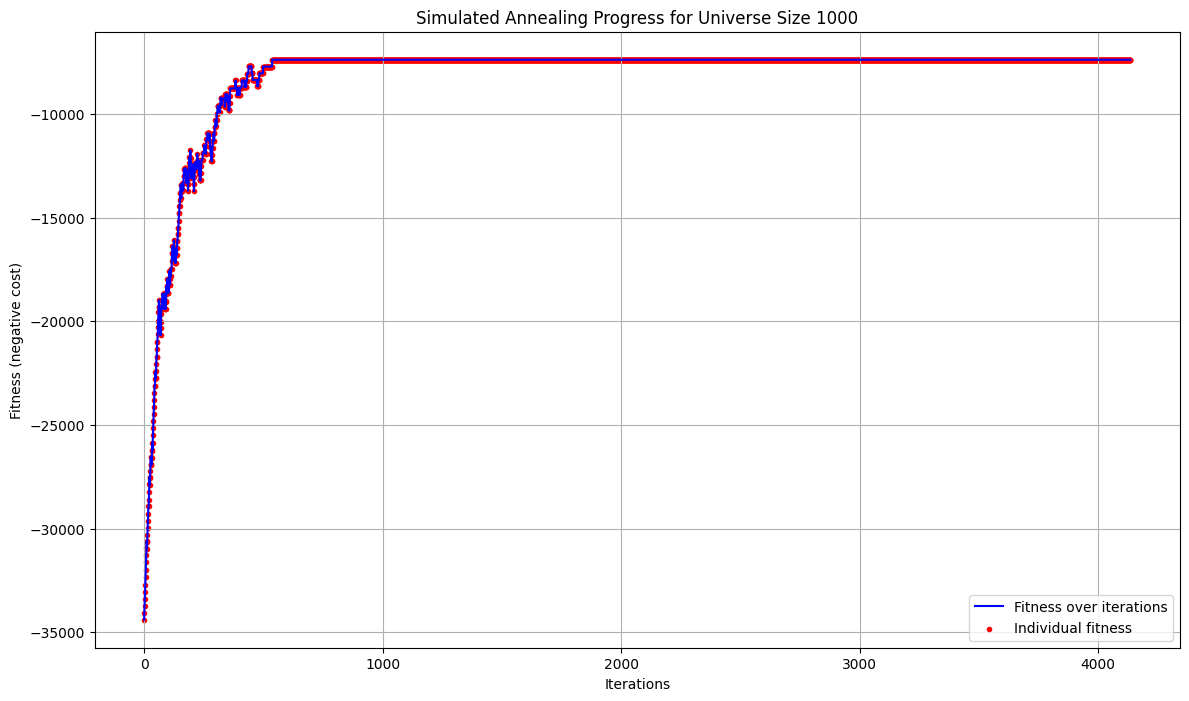

Solving for Universe Size: 10000, Num Sets: 1000, Density: 0.2


Simulated Annealing Progress:   0%|          | 0/20000 [00:00<?, ?it/s]ic| iteration: 0
    best_fitness: (np.True_, np.float64(-2287995.410316671))
    temperature: 995.0
ic| iteration: 1
    best_fitness: (np.True_, np.float64(-2283536.998858531))
    temperature: 990.025
Simulated Annealing Progress:   0%|          | 2/20000 [00:00<20:49, 16.00it/s]ic| iteration: 2
    best_fitness: (np.True_, np.float64(-2283536.998858531))
    temperature: 985.074875
ic| iteration: 3
    best_fitness: (np.True_, np.float64(-2283536.998858531))
    temperature: 980.149500625
Simulated Annealing Progress:   0%|          | 4/20000 [00:00<23:23, 14.25it/s]ic| iteration: 4
    best_fitness: (np.True_, np.float64(-2283536.998858531))
    temperature: 975.248753121875
ic| iteration: 5
    best_fitness: (np.True_, np.float64(-2283536.998858531))
    temperature: 970.3725093562656
Simulated Annealing Progress:   0%|          | 6/20000 [00:00<26:03, 12.79it/s]ic| iteration: 6
    best_fitness: (np.True_, np

Best solution cost for Universe Size 10000: (np.True_, np.float64(-137236.87405063014))
Best solution found: [False False False False False False  True False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False  True False False
 False  True False False False False False False False False False  True
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False Fa

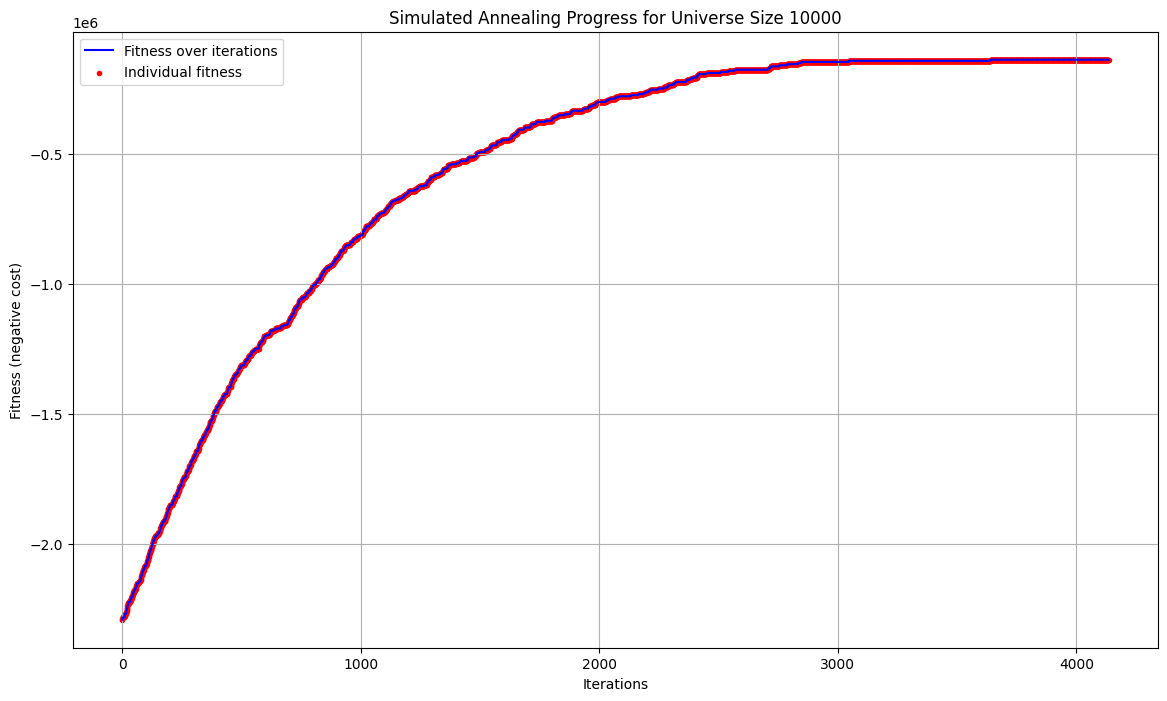

Solving for Universe Size: 100000, Num Sets: 10000, Density: 0.1


Simulated Annealing Progress:   0%|          | 0/20000 [00:00<?, ?it/s]ic| iteration: 0
    best_fitness: (np.True_, np.float64(-125559108.87586343))
    temperature: 995.0
Simulated Annealing Progress:   0%|          | 1/20000 [00:02<15:13:11,  2.74s/it]ic| iteration: 1
    best_fitness: (np.True_, np.float64(-125559108.87586343))
    temperature: 990.025
Simulated Annealing Progress:   0%|          | 2/20000 [00:04<11:07:13,  2.00s/it]ic| iteration: 2
    best_fitness: (np.True_, np.float64(-125559108.87586343))
    temperature: 985.074875
Simulated Annealing Progress:   0%|          | 3/20000 [00:06<12:57:40,  2.33s/it]ic| iteration: 3
    best_fitness: (np.True_, np.float64(-125534255.13906464))
    temperature: 980.149500625
Simulated Annealing Progress:   0%|          | 4/20000 [00:08<10:53:37,  1.96s/it]ic| iteration: 4
    best_fitness: (np.True_, np.float64(-125508823.87145242))
    temperature: 975.248753121875
Simulated Annealing Progress:   0%|          | 5/20000 [00:11<12:

In [ ]:
for universe_size, num_sets, density in zip(UNIVERSE_SIZES, NUM_SETS_LIST, DENSITIES):
    print(f"Solving for Universe Size: {universe_size}, Num Sets: {num_sets}, Density: {density}")
    #rng use a random numeric generator 
    
    rng = np.random.Generator(np.random.PCG64([universe_size, num_sets, int(10_000 * density)]))
    
    #sets is a boolean matrix NUM_SETS x UNIVERSE_SIZE of random numbers between 0 and 1, every of them associated with
    # an element of the universe, if the random number < Density the element is coverered by the set.
    SETS = rng.random((num_sets, universe_size)) < density

    #if an element isn't covered by any set, it is inserted in a random set
    for s in range(universe_size):
        if not np.any(SETS[:, s]):
            SETS[np.random.randint(num_sets), s] = True

    #for each set a cost proportional to the number of element covered is associated to it
    COSTS = np.pow(SETS.sum(axis=1), 1.1)
    
    best_solution, best_cost, history = simulated_annealing(SETS, COSTS, num_sets, density, rng)
    
    print(f"Best solution cost for Universe Size {universe_size}: {best_cost}")
    print(f"Best solution found: {best_solution}")

    # Plot della storia del fitness
    plt.figure(figsize=(14, 8))
    plt.plot(range(len(history)), history, color="blue", label="Fitness over iterations")
    plt.scatter(range(len(history)), history, color="red", marker=".", label="Individual fitness")
    plt.title(f"Simulated Annealing Progress for Universe Size {universe_size}")
    plt.xlabel("Iterations")
    plt.ylabel("Fitness (negative cost)")
    plt.legend()
    plt.grid(True)
    plt.show()

[1] https://www.studysmarter.co.uk/explanations/computer-science/algorithms-in-computer-science/set-cover-problem/#:~:text=A%20common%20method%20used%20is,involves%20using%20Linear%20Programming%20Relaxation.